# FINAL PROJECT: Rain in Australia

KELOMPOK 4 :
- Jonathan Adiwinata
- Melin Febriani


## Introduction

Logistic Regression dan Support Machine Vector adalah algoritma yang secara umum digunakan dalam Supervised Machine Learning. Keduanya biasanya digunakan untuk memecahkan masalah klasifikasi. Logistic Regression bekerja dengan memprediksi probabilitas sampel data termasuk dalam satu klasifikasi atau salah satu klasifikasi lainnya dengan probabilitas numerik dalam rentang 0 sampai 1. Berdasarkan probabilitas tersebut akan diberikan klasifikasi 1 atau 0. Sedangkan Support Machine Learning secara umum bekerja dengan membangun hyperlane dalam multidimensional space untuk memisahkan kelas yang berbeda. Ide inti dari SVM adalah menemukan maximum marginal hyperplane(MMH) yang paling baik untuk membagi dataset menjadi beberapa kelas. Pada project kali ini kami akan menganalisis data hujan harian selama 10 tahun di Australia berdasarkan faktor-faktor yang mempengaruhi cuaca hujan, antara lain seperti temperatur, curah hujan, arah kecepatan angin, tekanan udara dan lain-lain untuk mengetahui besok harinya disana hujan atau tidak pada kolom RainTomorrow sebagai target variable yang akan diprediksi. Jika “Yes” maka artinya besok harinya disana hujan 1mm atau lebih.


https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## Import Libraries

Install dan import libraries yang digunakan.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

KeyboardInterrupt: 

ImportError: numpy.core.multiarray failed to import

In [2]:
mpl.style.use(['ggplot'])

## Data Loading

In [3]:
#  data = pd.read_csv('C:/Kuliah/Studi Independen/weatherAUS.csv')
data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/weatherAUS.csv')

Memanggil bagian kepala data.

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Memanggil bagian ekor data.

In [5]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Mengecek dimensi data.

In [6]:
data.shape

(145460, 23)

Dari hasil diatas terdapat 145.460 baris data dan 23 kolom data

Mengecek info dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Mengecek tipe data apa saja yg ada pada variabel.

In [8]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Terdapat 6 variabel bertipe object dan sisanya float

Statistik Deskriptif.

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


Mengecek atribut data.

In [11]:
data.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


Dari hasil diatas diketahui bahwa Canberra memiliki data yang paling banyak yaitu berjumlah 3436 data

In [12]:
data.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

Dari hasil diatas diketahui bahwa arah kecepatan angin yang paling tinggi yaitu arah barat (W) yang berjumlah 9915 data

In [13]:
data.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

Dari hasil diatas diketahui bahwa arah angin jam 9 pagi paling sering yaitu arah utara (N) yang berjumlah 11758 data

In [14]:
data.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

Dari hasil diatas diketahui bahwa arah angin jam 3 sore paling sering yaitu arah tenggara (SE) yang berjumlah 10838 data

In [15]:
data.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [16]:
data['RainToday'].value_counts()/len(data)

No     0.758415
Yes    0.219167
Name: RainToday, dtype: float64

Dari hasil diatas, pada variabel 'RainToday' untuk atribut No muncul sebanyak 75.84 % kali dan atribut Yes sebesar 21.9% kali

In [17]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [18]:
data['RainTomorrow'].value_counts()/len(data)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

Dari hasil diatas, pada variabel 'Rain Tomorrow' untuk atribut No muncul sebanyak 75.83 % kali dan atribut Yes sebesar 21.9% kali

## Data Exploration

No     110319
Yes     31880
Name: RainToday, dtype: int64


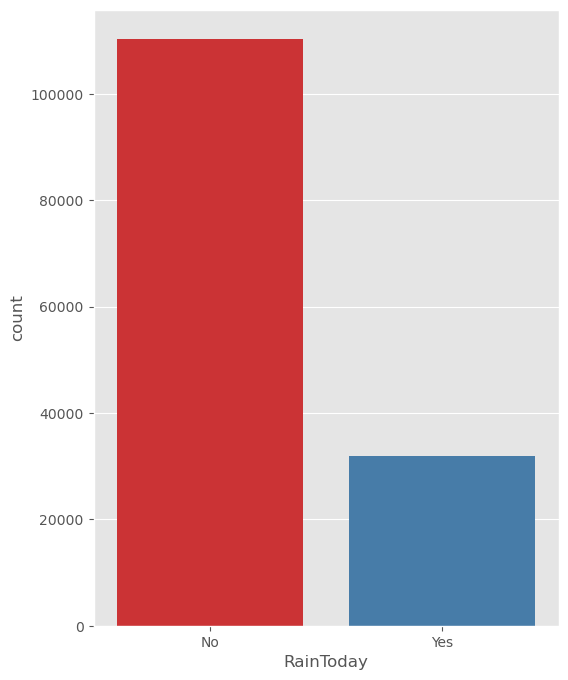

In [19]:
fig, ax = plt.subplots(figsize=(6, 8))
print(data.RainToday.value_counts())
ax = sns.countplot(x="RainToday", data=data, palette="Set1")
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'RainToday', atribut 'No' memiliki 110319 data, dan atribut 'Yes' memiliki 31880 data.

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


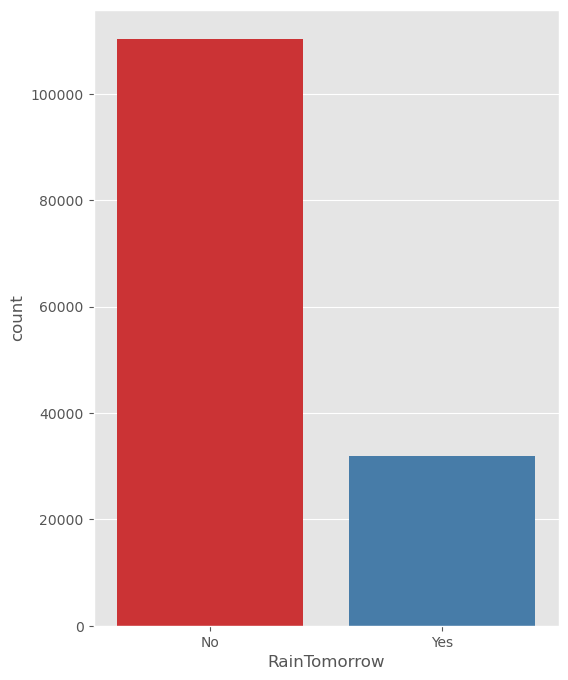

In [20]:
fig, ax = plt.subplots(figsize=(6, 8))
print(data.RainTomorrow.value_counts())
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'RainTomorrow', atribut 'No' memiliki 110316 data, dan atribut 'Yes' memiliki 31877 data.

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


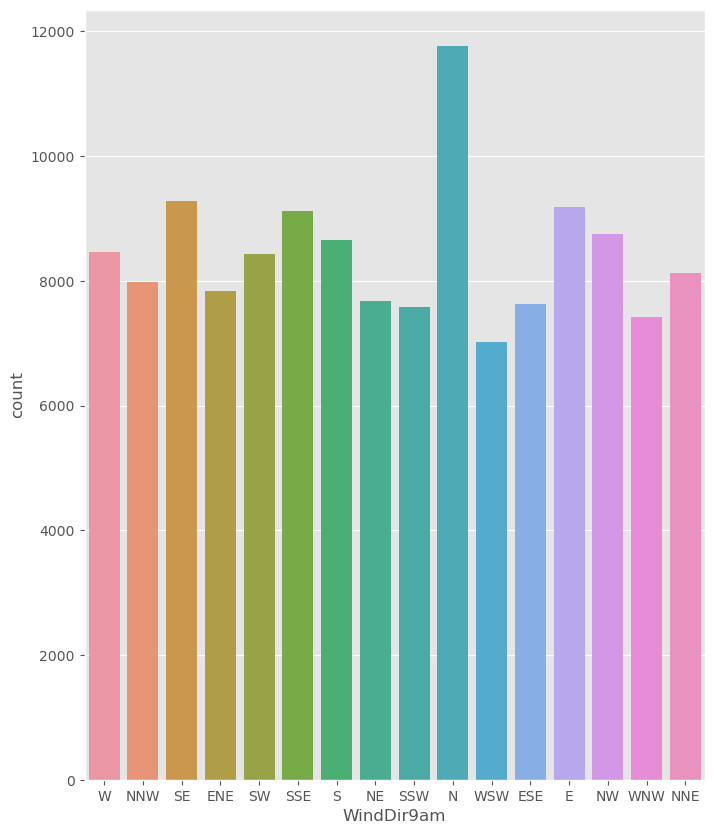

In [21]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindDir9am.value_counts())
ax = sns.countplot(x="WindDir9am", data=data)
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'WindDir9am', arah mata angin pada jam 9 pagi paling banyak adalah arah utara (N)

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


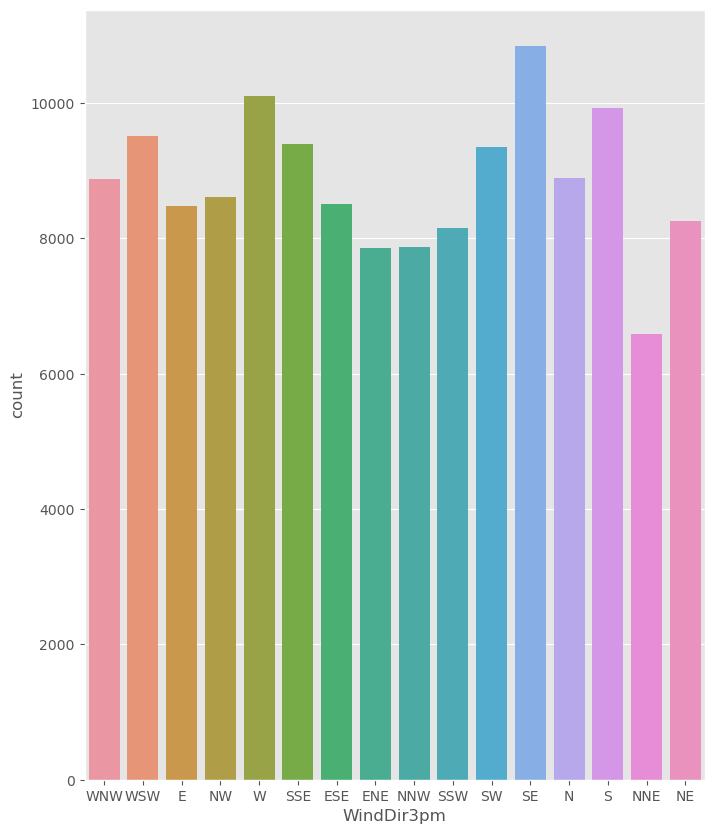

In [22]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindDir3pm.value_counts())
ax = sns.countplot(x="WindDir3pm", data=data)
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'WindDir3pm', arah mata angin pada jam 3 sore paling banyak adalah arah tenggara (SE)

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


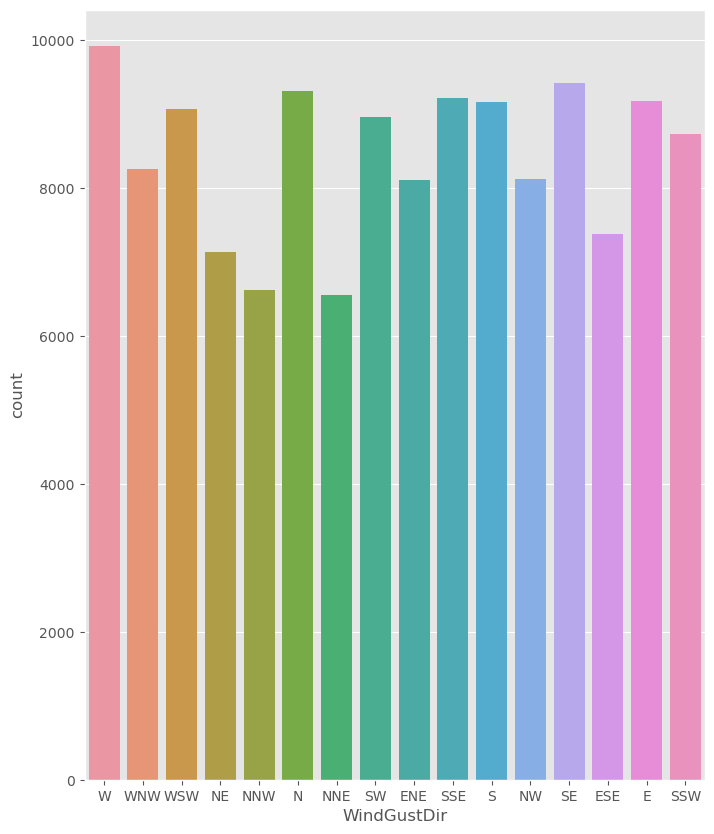

In [23]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindGustDir.value_counts())
ax = sns.countplot(x="WindGustDir", data=data)
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'WindGustDir', arah kecepatan angin yang paling tinggi adalah arah barat (W) dan yang kedua paling tinggi adalah arah tenggara (SE)

Mengecek Outlier

In [5]:
numerical_columns = data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


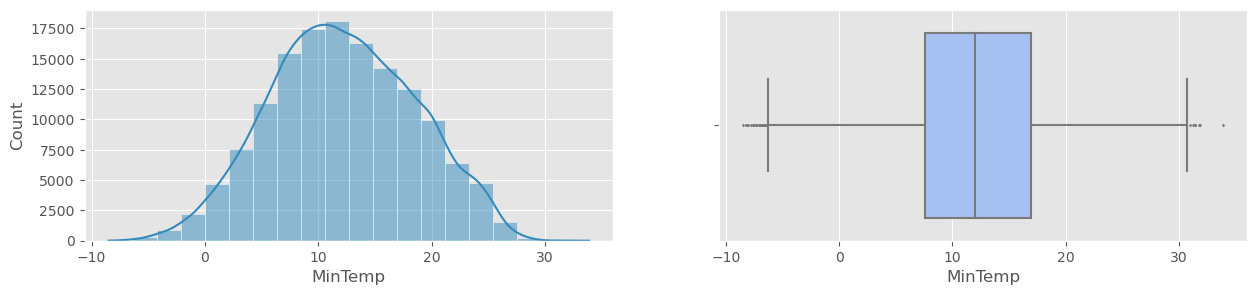

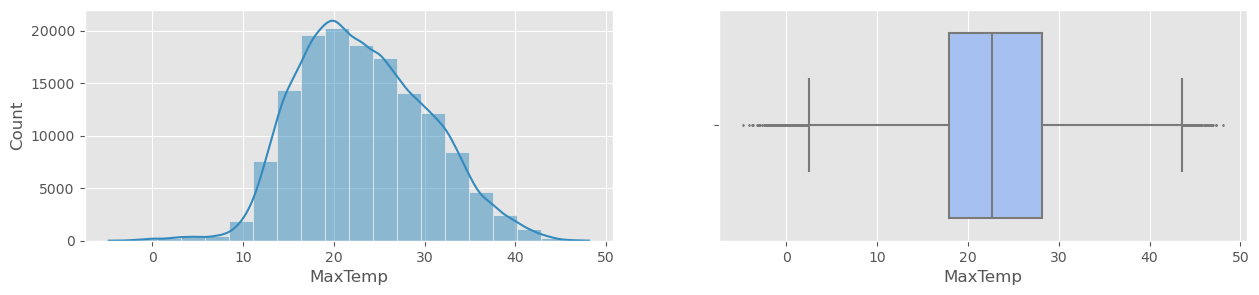

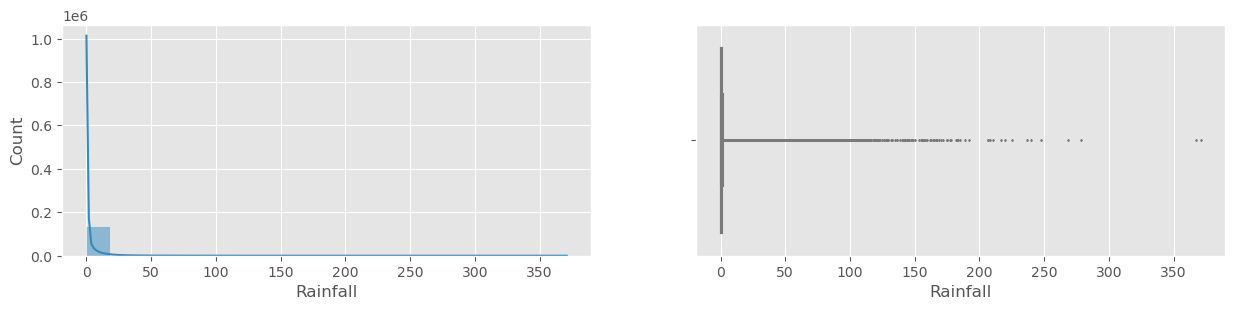

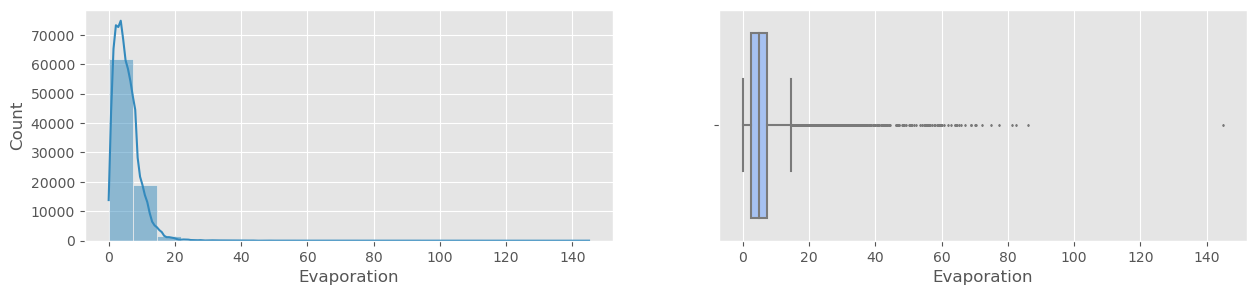

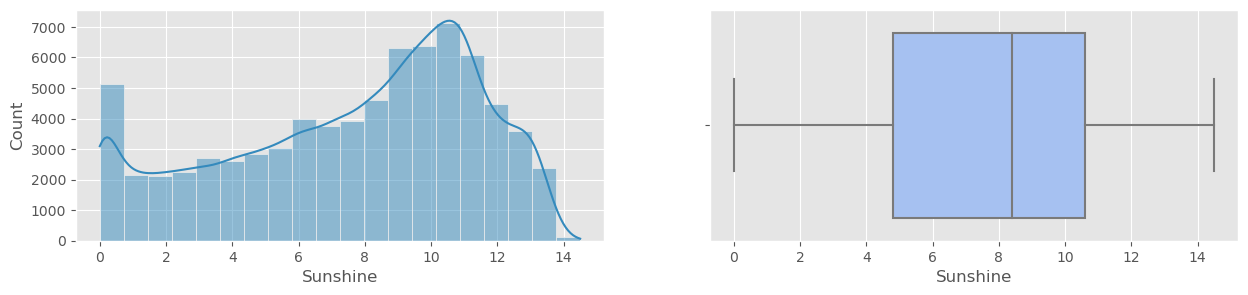

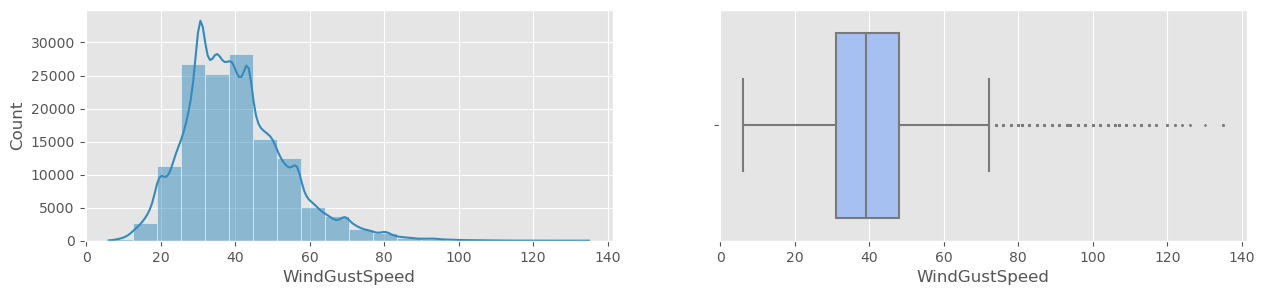

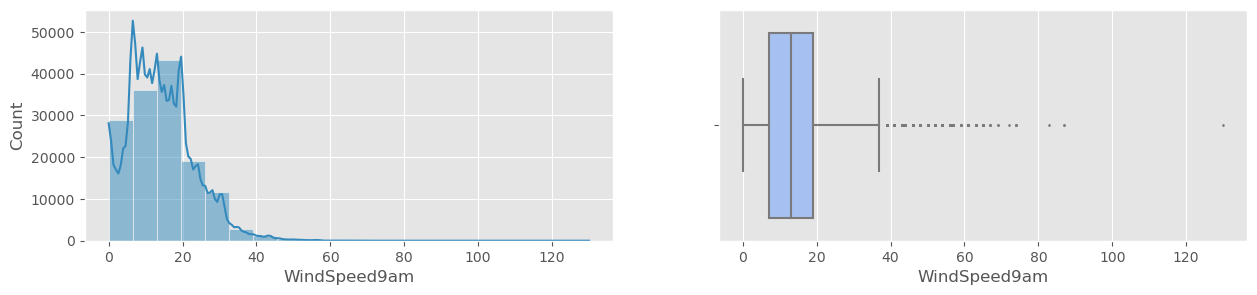

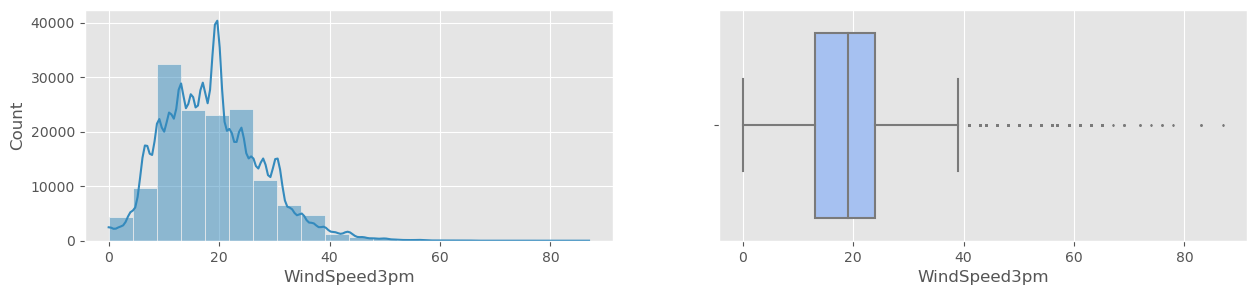

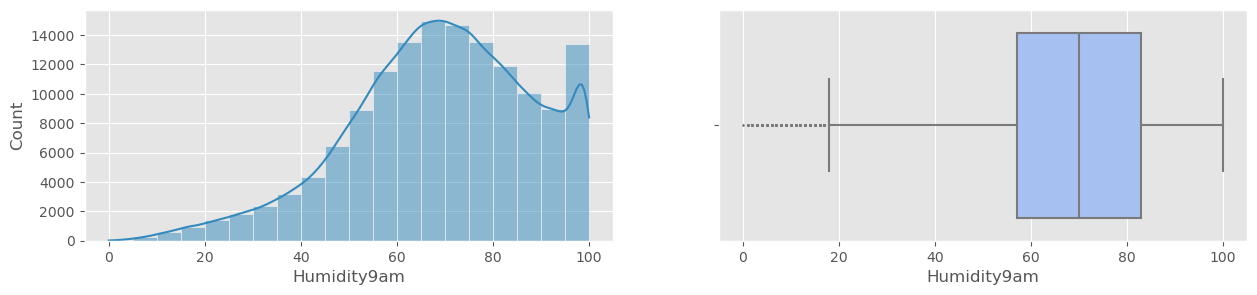

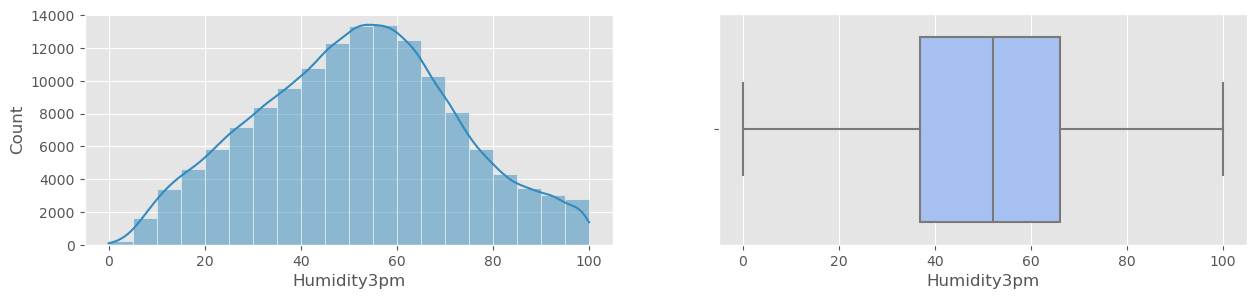

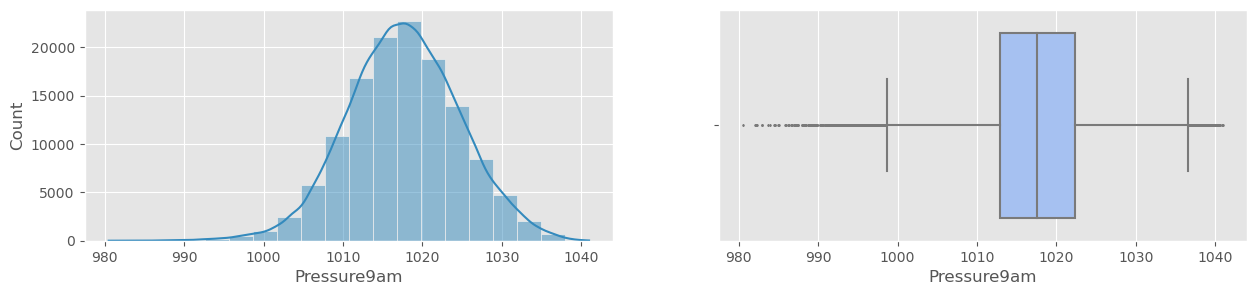

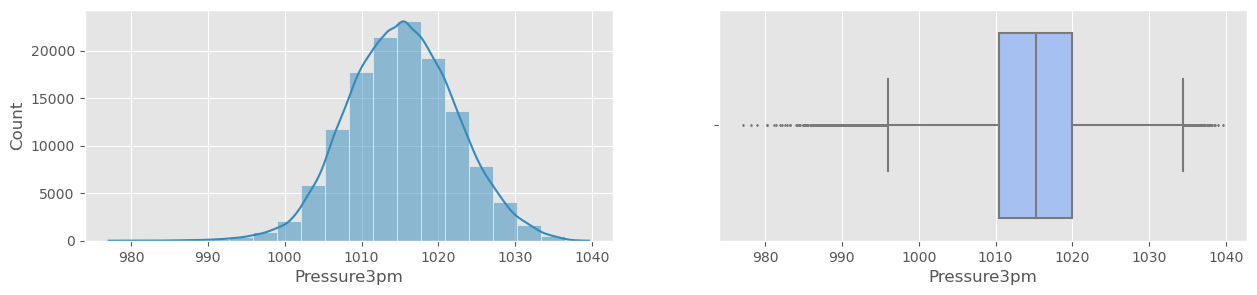

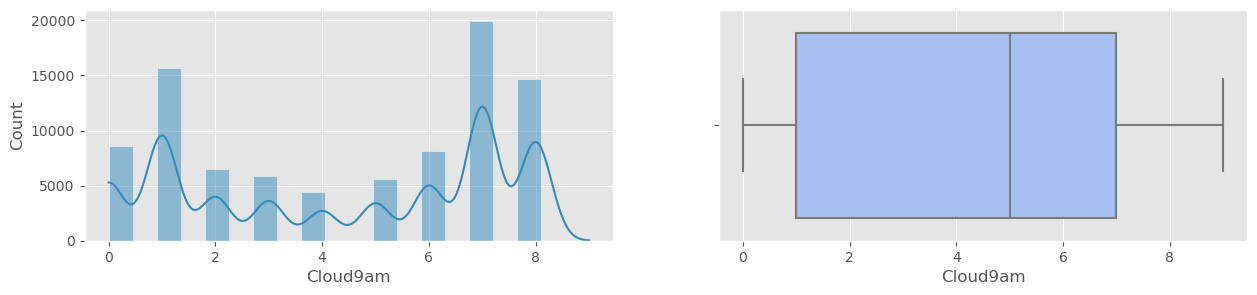

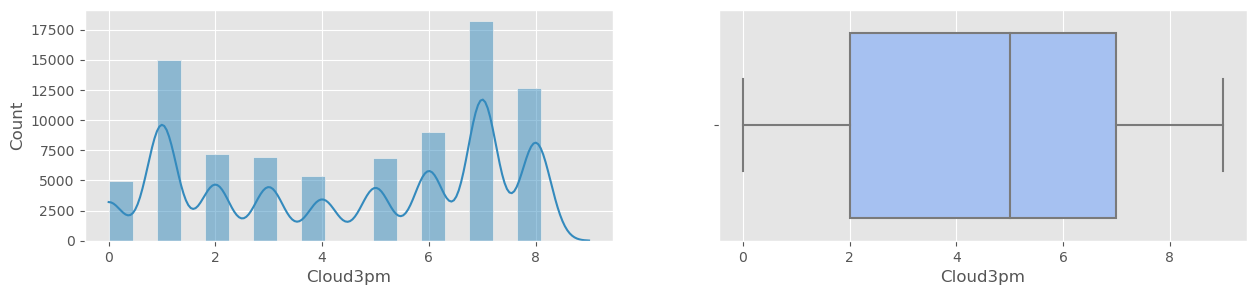

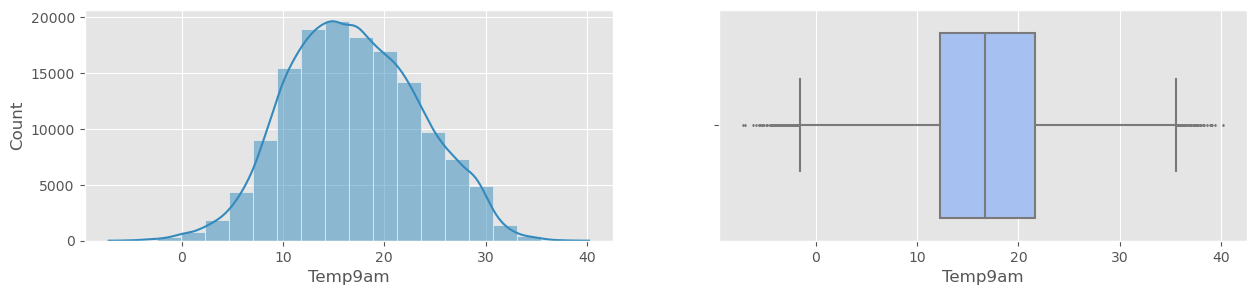

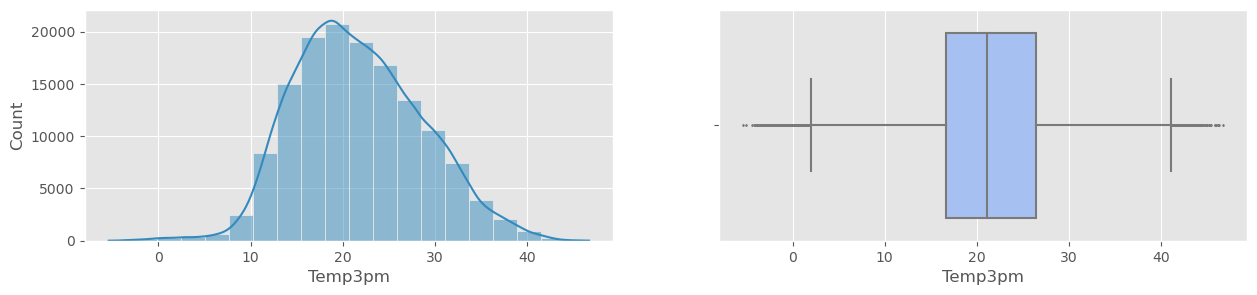

In [6]:
for i in numerical_columns:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Berdasarkan hasil output diatas, dari boxplot tersebut dapat terlihat bahwa hampir seluruh kolom numerikal terdapat outlier kecuali pada kolom 'Sunshine','Humidity3pm', 'Cloud3pm' dan 'Cloud9am'

Menampilkan Heatmap.

<AxesSubplot:>

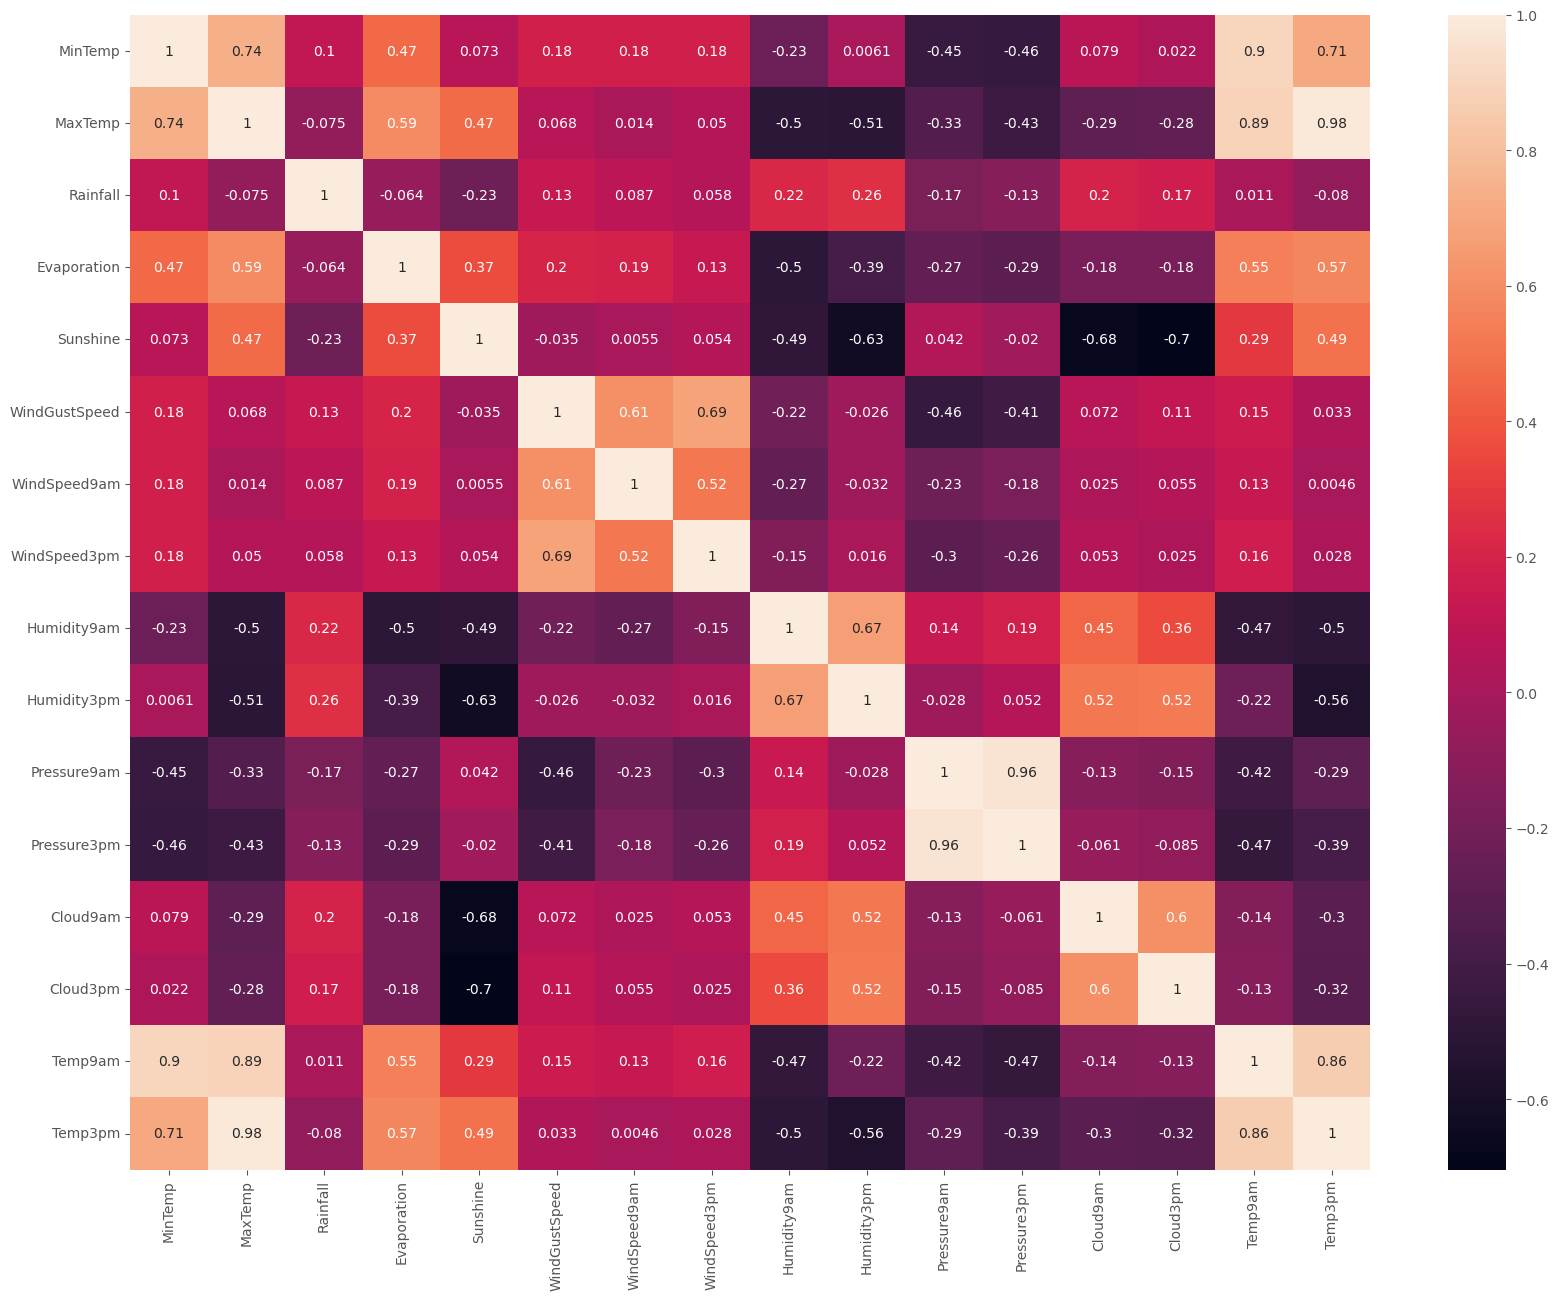

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

Variabel yang memiliki korelasi yang erat adalah :
1. MinTemp dan MaxTemp sangat berkorelasi
2. MinTemp dan Temp9am sangat berkorelasi.
3. MinTemp dan Temp3pm sangat berkorelasi.
4. MaxTemp dan Temp9am sangat berkorelasi.
5. MaxTemp dan Temp3pm sangat berkorelasi.
6. Temp3pm dan Temp9am sangat berkorelasi.
7. Pressure9am dan Pressure3pm sangat berkorelasi.

Karena terdapat variabel yang saling berkorelasi artinya variabel tersebut dapat menggambarkan satu sama lain sehingga hanya diperlukan salah satu variabel saja 

## Data Cleaning

Melakukan drop pada data yang memiliki korelasi yang kuat

In [4]:
clean_data = data.drop(['Temp3pm', 'Temp9am','Pressure9am'],axis=1)

In [165]:
clean_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

Mengecek jumlah data yang memiliki duplicate.

In [166]:
clean_data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [167]:
clean_data.duplicated().value_counts()

False    145460
dtype: int64

Tidak terdapat data yang duplicated pada data

### Menambah Kolom Baru

Mengonversi Date menjadi Year, Month, dan Day.

In [5]:
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

clean_data['Year'] = clean_data['Date'].dt.year
clean_data['Month'] = clean_data['Date'].dt.month
clean_data['Day'] = clean_data['Date'].dt.day

Melakukan drop pada variable Date setelah dikonversi.

In [6]:
clean_data = clean_data.drop('Date', axis=1)

## Data Preprocessing

### Mengisi Missing Value

In [7]:
clean_data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

Hasil diatas menunjukkan bahwa banyak terdapat data yang masih kosong pada seluruh variabel kecuali 'Year', 'Month', 'Day' dan 'Location'.

Mengelompokkan kolom yang bertipe data 'object' atau kategorik.

In [8]:
categorical_columns = clean_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [9]:
categorical_columns = categorical_columns.append(clean_data[['Year', 'Month', 'Day']].columns)
print(categorical_columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')


Mengecek missing value pada kolom kategorik.

In [10]:
clean_data[categorical_columns].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64

Mengganti missing value dalam kolom kategorik dengan nilai Modus, tetapi missing value pada kolom RainTomorrow dihapus.

In [11]:
for column in clean_data[categorical_columns]:
    if column == 'RainTomorrow':
        clean_data = clean_data.dropna(axis=0, how='any', subset=["RainTomorrow"])
    elif clean_data[column].isnull().sum() > 0:
        clean_data[column] = clean_data[column].fillna(clean_data[column].mode()[0])

In [12]:
clean_data[categorical_columns].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
Year            0
Month           0
Day             0
dtype: int64

Sudah tidak terdapat lagi missing value pada data kategorik

Mengelompokkan kolom yang bertipe data 'int', 'float', 'float64' atau numerik.

In [13]:
numerical_columns = clean_data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Year', 'Month',
       'Day'],
      dtype='object')


In [14]:
numerical_columns = numerical_columns.drop(['Year', 'Month', 'Day'])
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')


Mengecek missing value pada kolom numerik.

In [15]:
clean_data[numerical_columns].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
dtype: int64

Mengisi missing value pada kolom numerik dengan menggunakan IterativeImputer. Sebelum menggunakan IterativeImputer, dilakukan encode terlebih dahulu.

In [16]:
le = LabelEncoder()
for col in categorical_columns:
    # Tipe data string diubah menjadi tipe data integer
    clean_data[col] = le.fit_transform(clean_data[col]).astype(int)

In [17]:
clean_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,71.0,22.0,1007.1,8.0,NaN,0,0,1,11,0
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,44.0,25.0,1007.8,NaN,NaN,0,0,1,11,1
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,38.0,30.0,1008.7,NaN,2.0,0,0,1,11,2
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,45.0,16.0,1012.8,NaN,NaN,0,0,1,11,3
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,82.0,33.0,1006.0,7.0,8.0,0,0,1,11,4


Selanjutnya mengisi missing value menggunakan IterativeImputer.

In [18]:
imputed_data = clean_data.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(imputed_data)

Mengecek apakah masih ada missing value atau tidak.

In [19]:
imputed_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

Sudah tidak ditemukan lagi missing value pada data.

### Data Scaling

In [20]:
numerical_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

<AxesSubplot:>

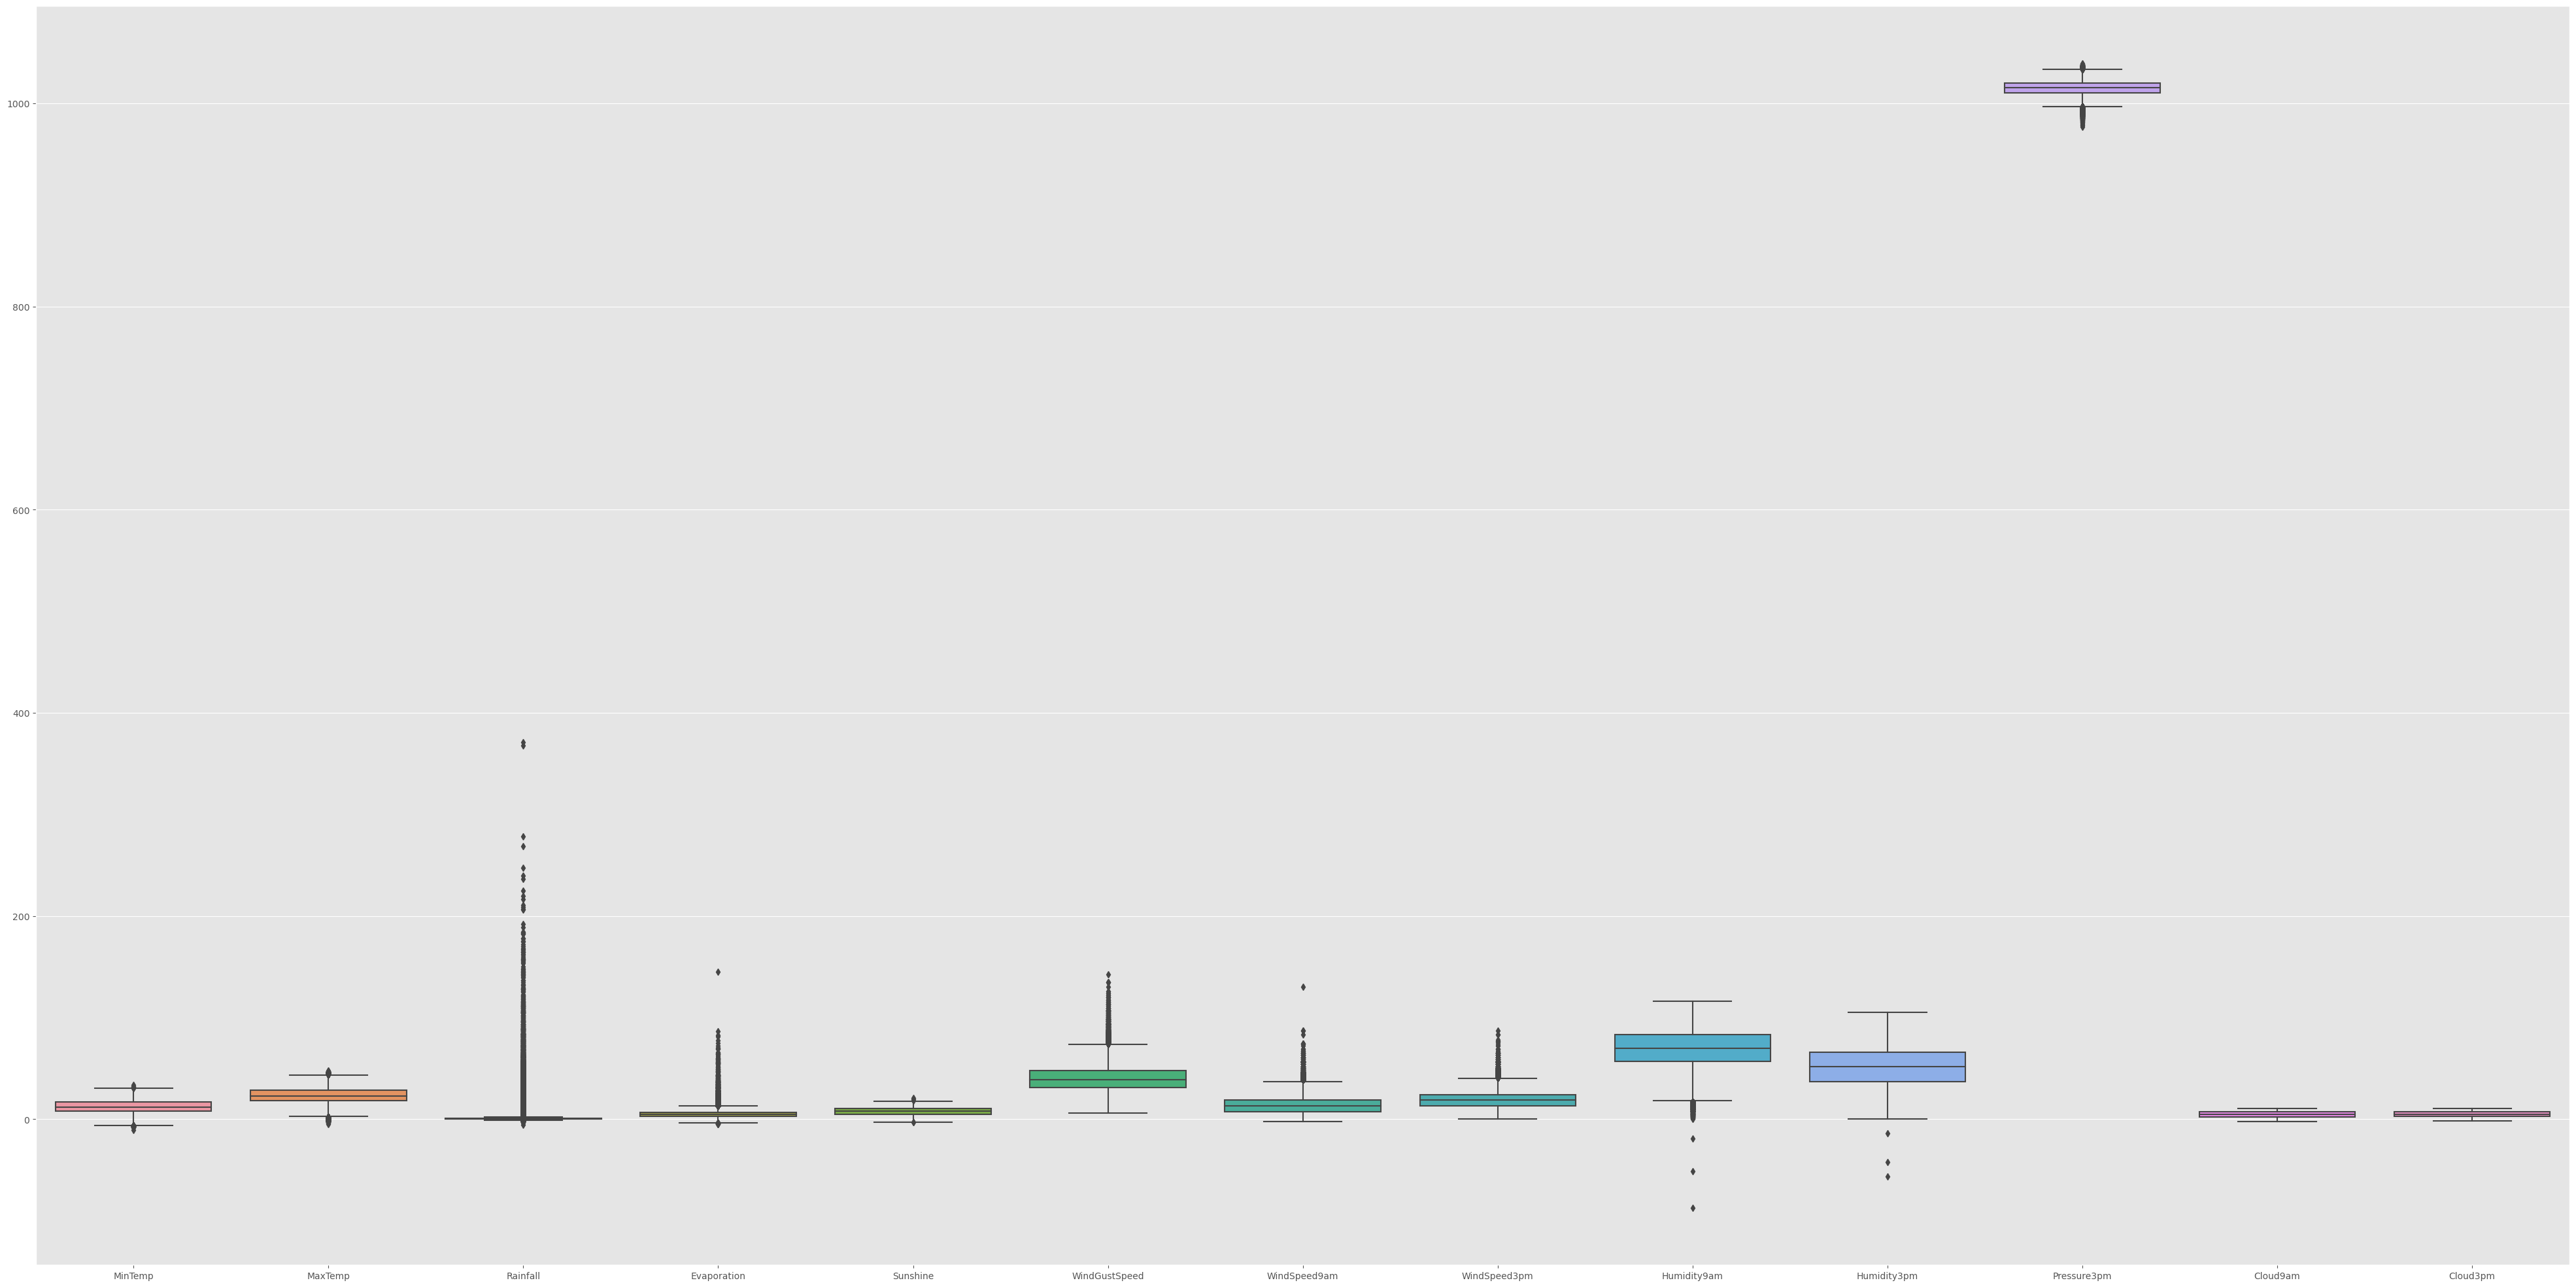

In [21]:
plt.figure(figsize=(50,25))
sns.boxplot(data=imputed_data[numerical_columns])

In [22]:
scaled_data = imputed_data.copy()

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(scaled_data)
scaled_data = pd.DataFrame(r_scaler.transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)

<AxesSubplot:>

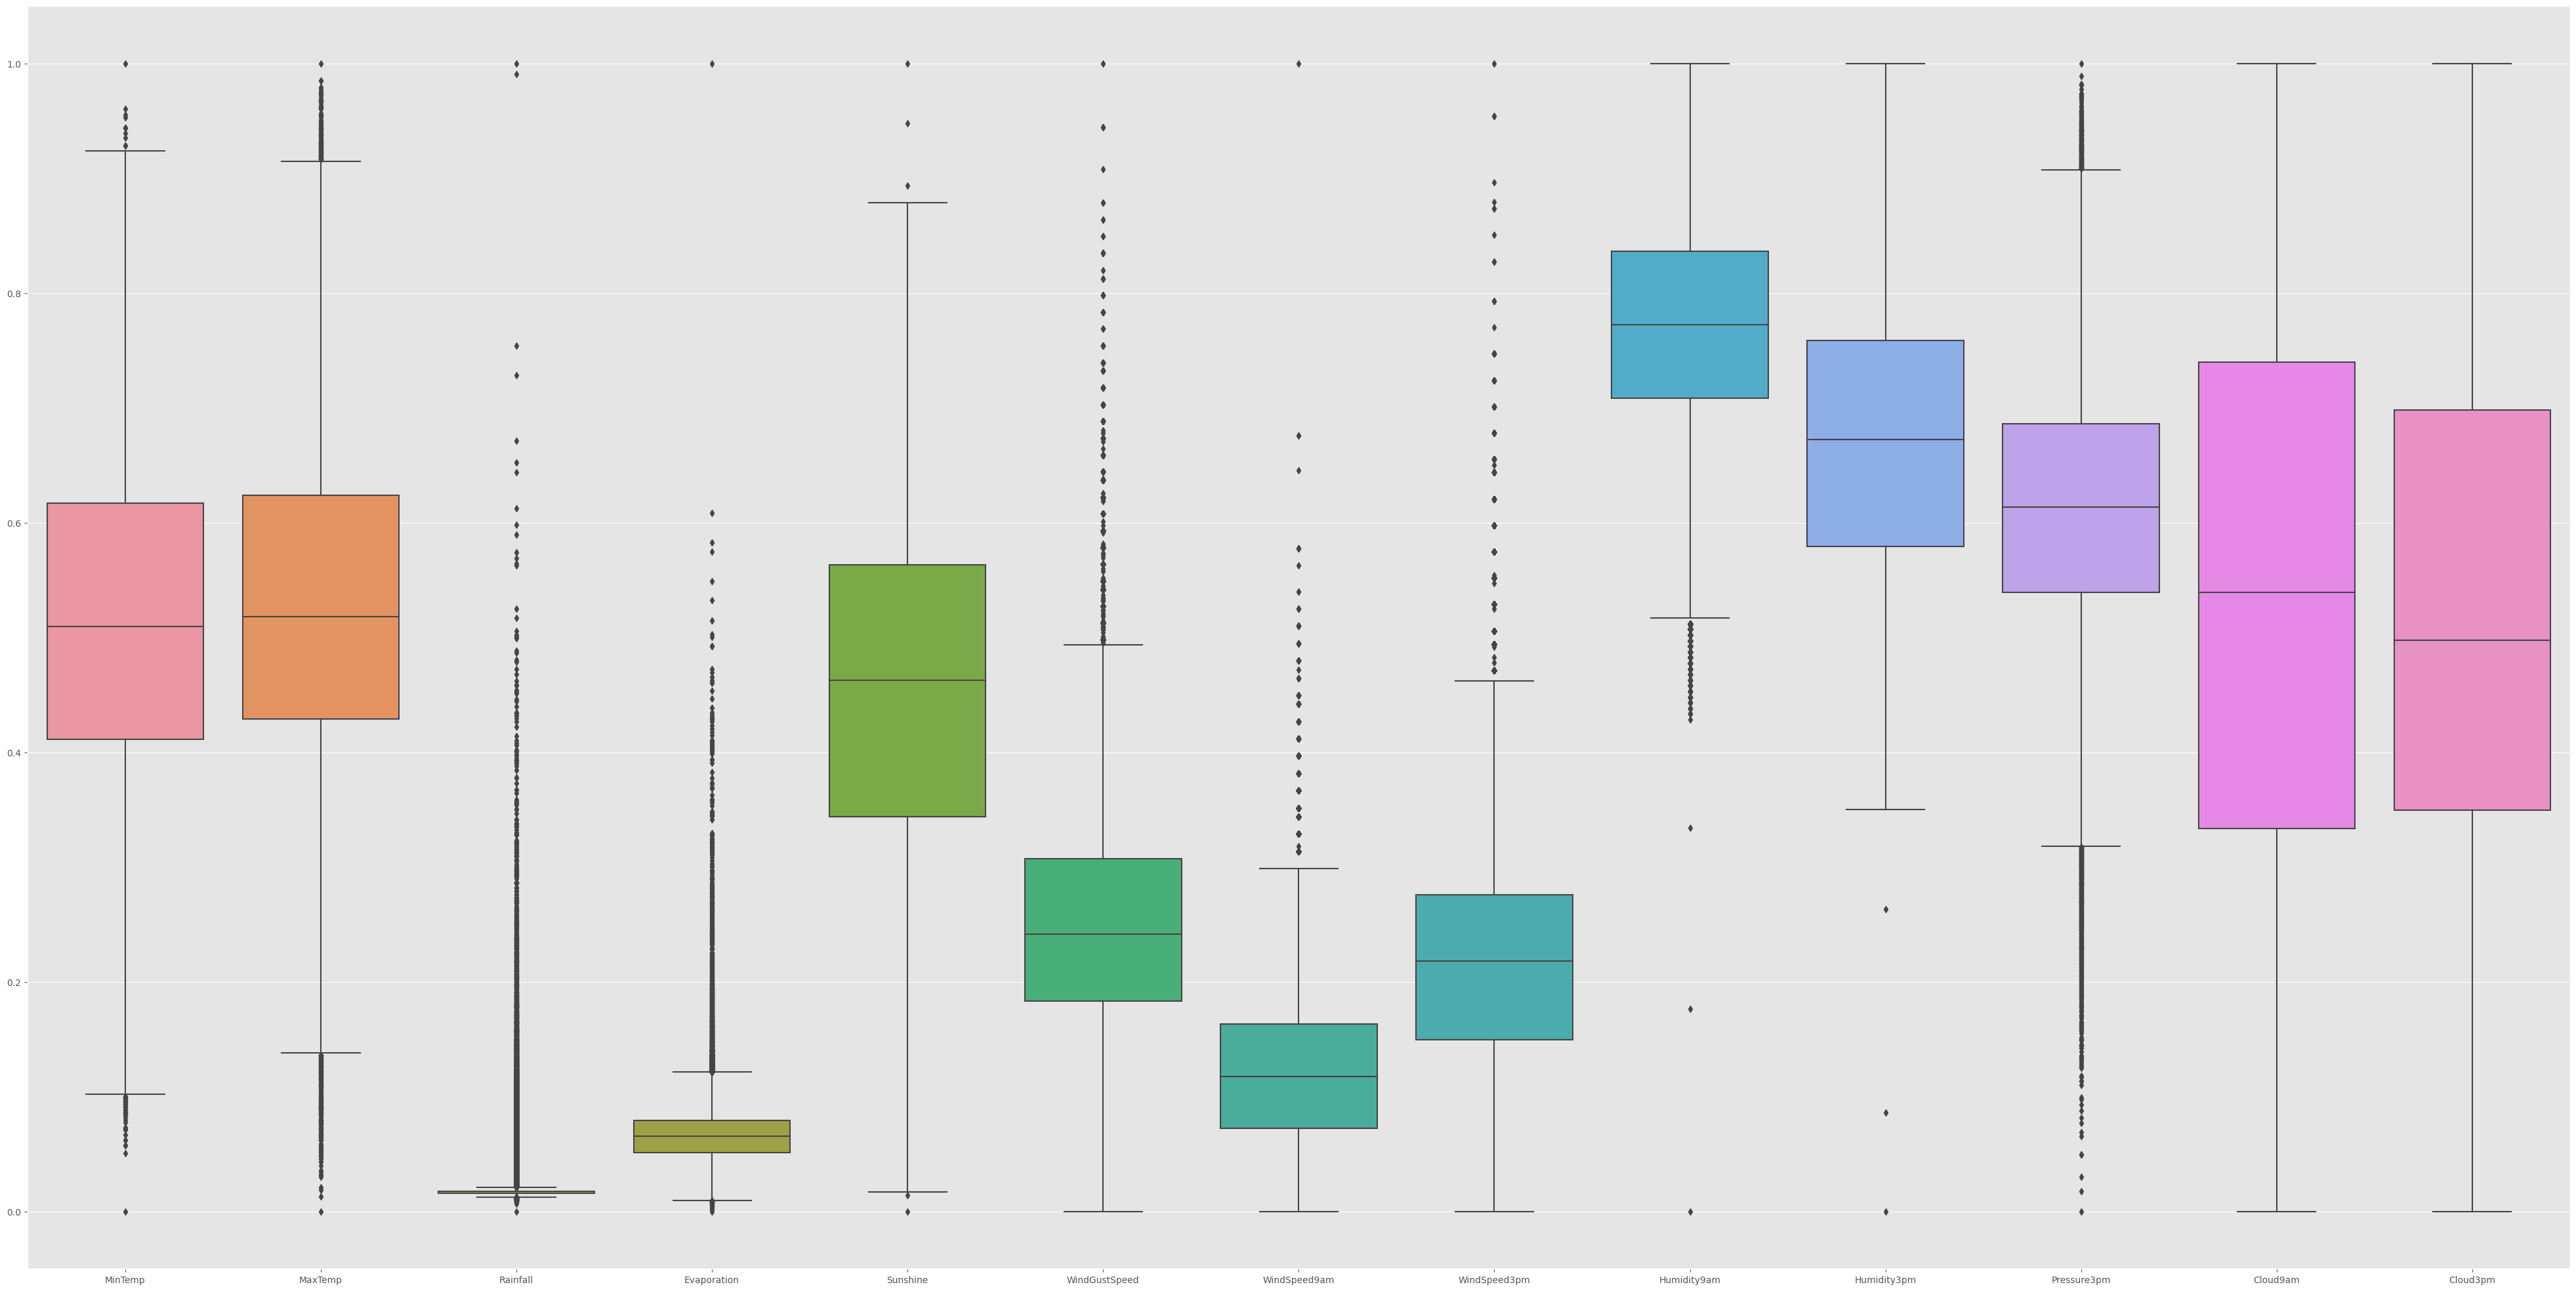

In [23]:
plt.figure(figsize=(50,25))
sns.boxplot(data=scaled_data[numerical_columns])

Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm memiliki outlier yang substansial.

In [215]:
outlier_features = ['Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm']
outlier_range = pd.DataFrame(columns = ["Feature", "Lowerbound", "Upperbound"])

for i,feature in enumerate(outlier_features):
    IQR = scaled_data[feature].quantile(0.75) - scaled_data['RainTomorrow'].quantile(0.25)
    lower_bound = scaled_data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = scaled_data[feature].quantile(0.75) + (IQR * 3)
    print(feature + "  outlier is < {lowerbound} and > {upperbound}".format(lowerbound=round(lower_bound,2), upperbound=round(upper_bound,2)))
    outlier_range.loc[i] = [feature, lower_bound, upper_bound]

Rainfall  outlier is < -0.04 and > 0.07
Evaporation  outlier is < -0.19 and > 0.32
WindGustSpeed  outlier is < -0.74 and > 1.23
WindSpeed9am  outlier is < -0.42 and > 0.65
WindSpeed3pm  outlier is < -0.68 and > 1.1
Humidity9am  outlier is < -1.8 and > 3.34
Humidity3pm  outlier is < -1.7 and > 3.04
Pressure3pm  outlier is < -1.52 and > 2.75


In [216]:
outlier_range

,Feature,Lowerbound,Upperbound
0,Rainfall,-0.037597,0.070948
1,Evaporation,-0.186935,0.317998
2,WindGustSpeed,-0.739500,1.230059
3,WindSpeed9am,-0.416521,0.652073
4,WindSpeed3pm,-0.678161,1.103448
5,Humidity9am,-1.800022,3.344645
6,Humidity3pm,-1.697159,3.035309
7,Pressure3pm,-1.520000,2.745600


### Menghapus Outlier

Menghapus outlier.

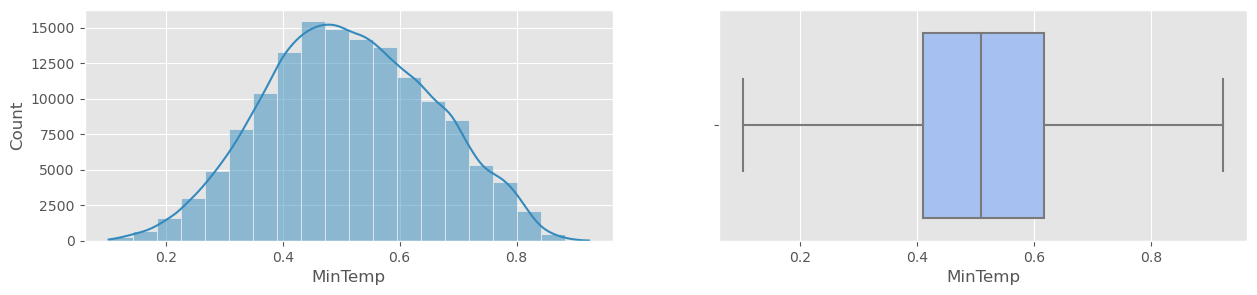

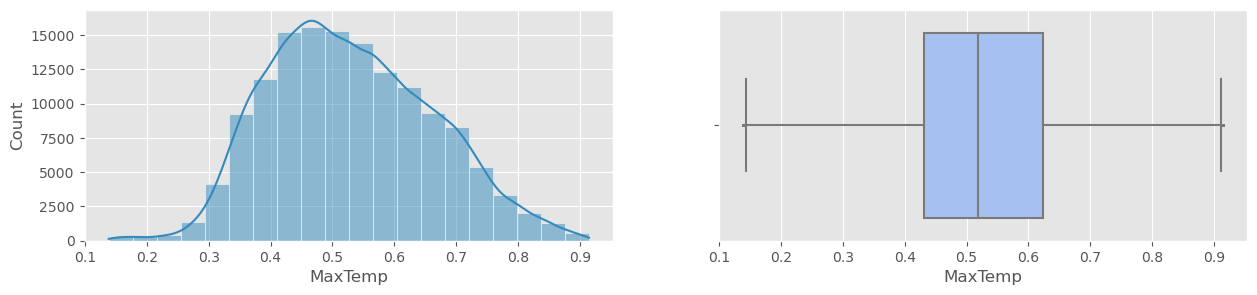

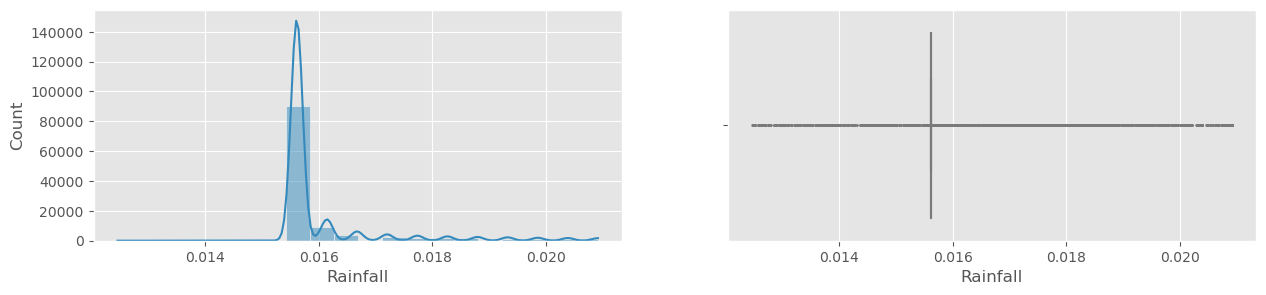

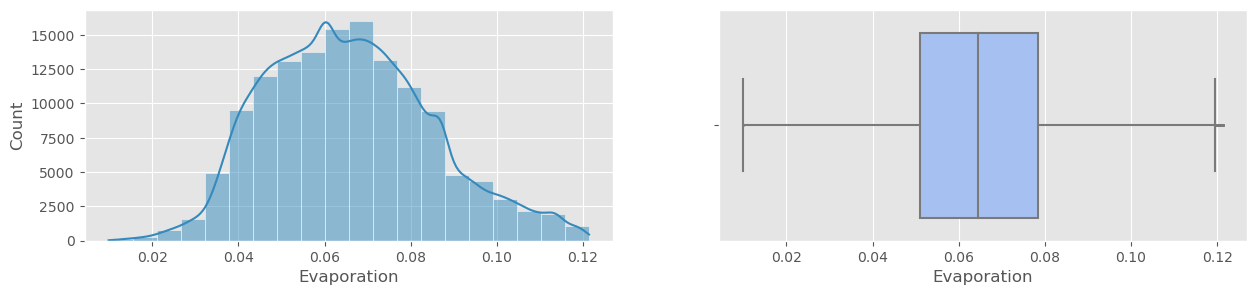

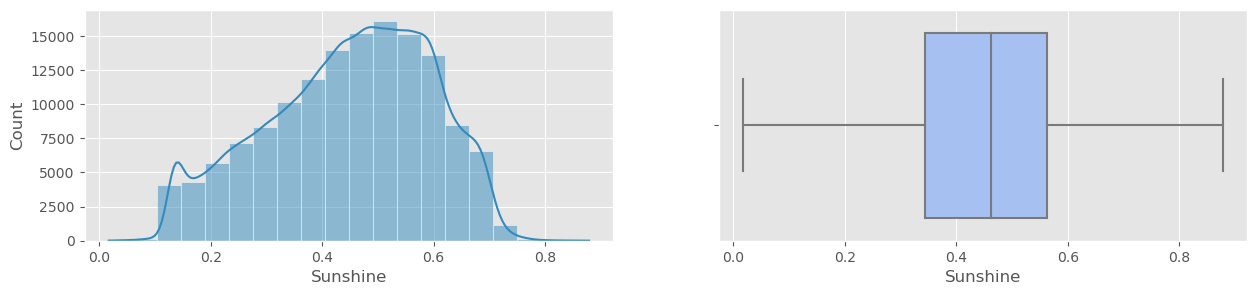

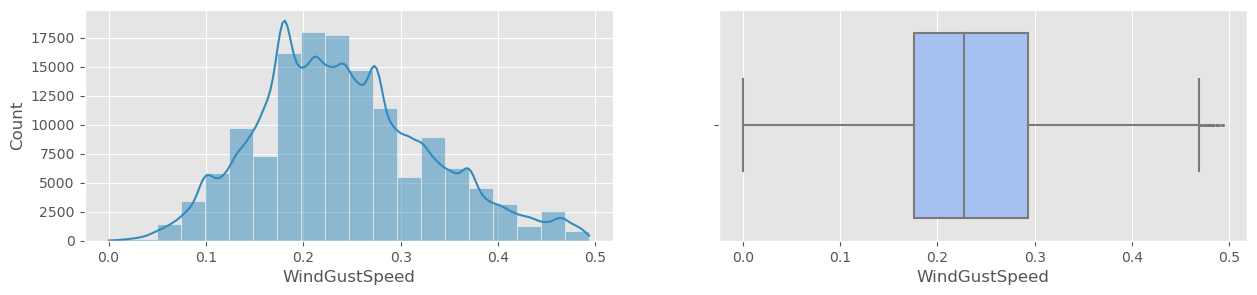

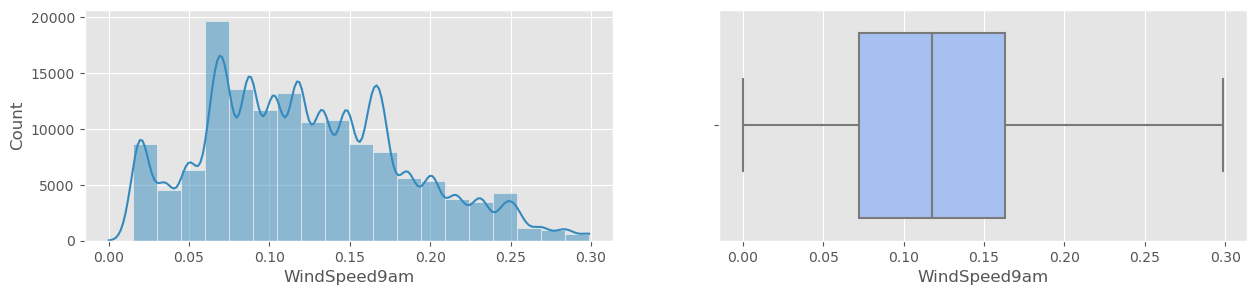

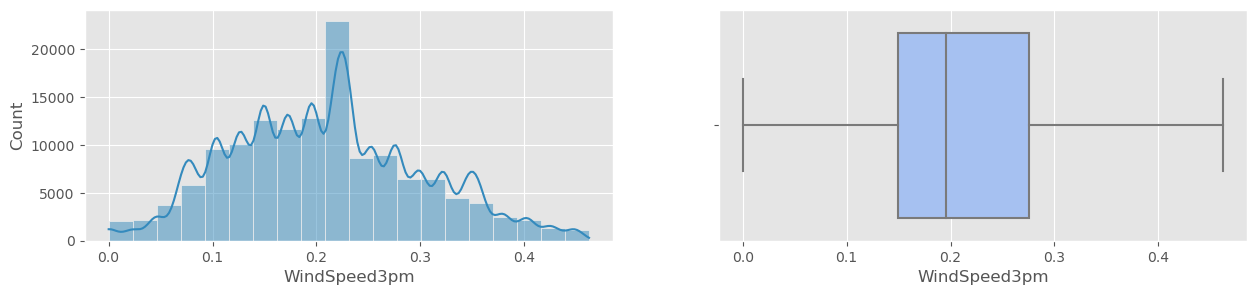

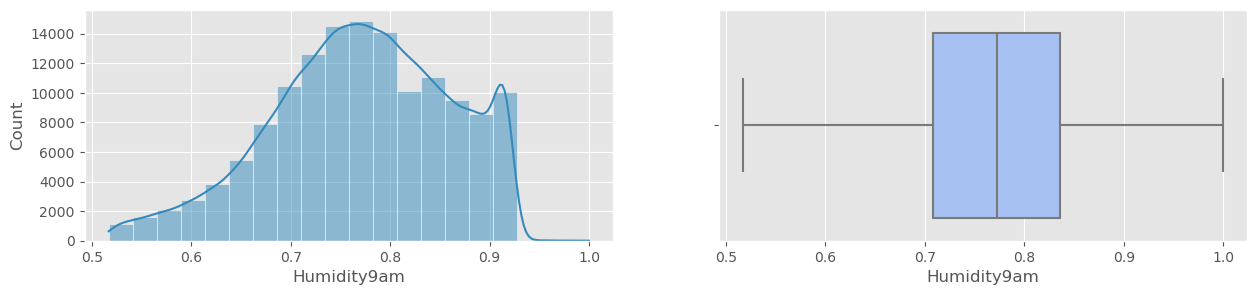

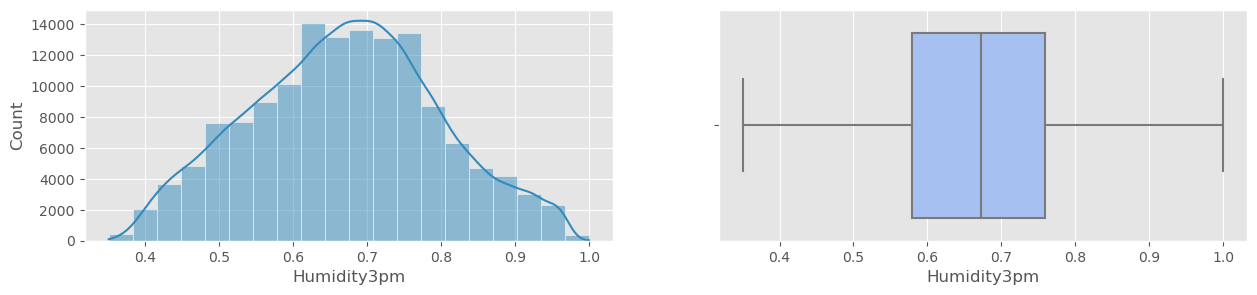

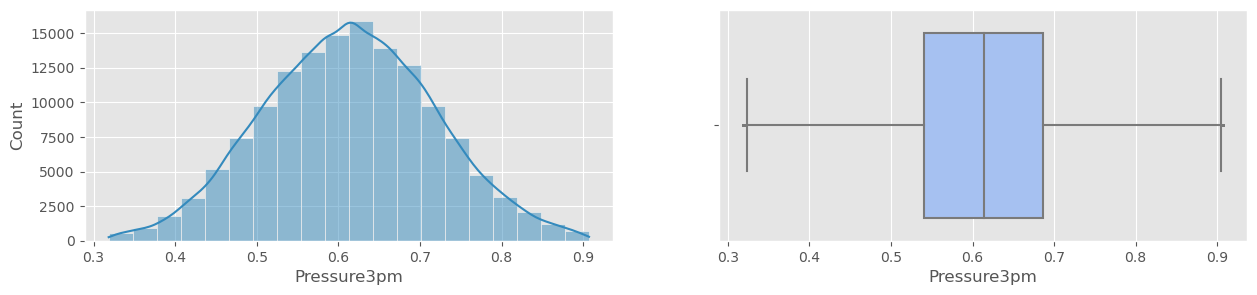

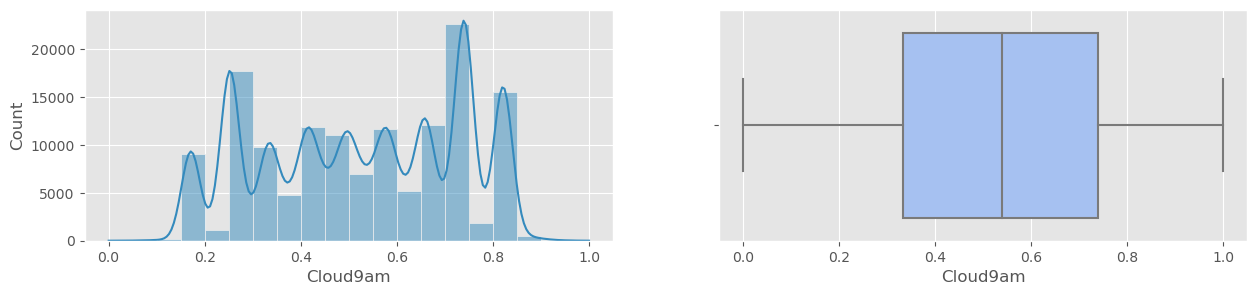

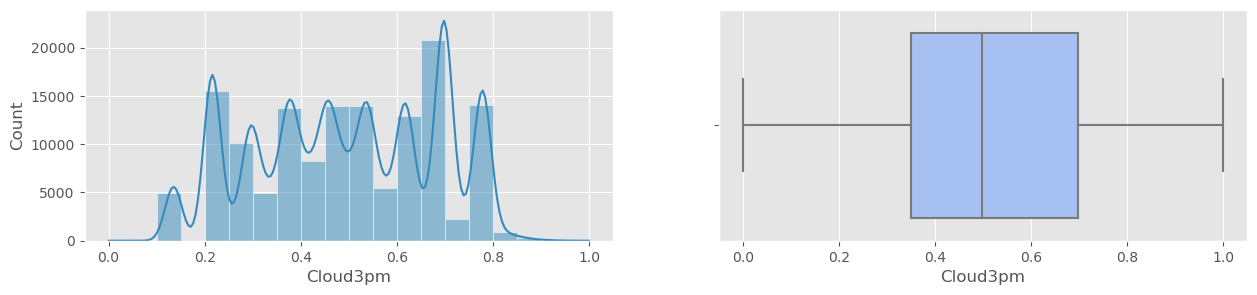

In [24]:
for col in scaled_data[numerical_columns]:
    Q1 = scaled_data[col].quantile(0.25)
    Q3 = scaled_data[col].quantile(0.75)
    IQR = Q3 - Q1
    scaled_data2 = scaled_data[~((scaled_data[col] < (Q1 - 1.5 * IQR)) | (scaled_data[col]  > (Q3 + 1.5 * IQR)))]
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(scaled_data2[col],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(scaled_data2[col], ax = axs[1], color='#99befd', fliersize=1);

In [140]:
scaled_data2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.523629,0.001617,0.033103,0.586207,0.866667,0.294574,0.866667,0.933333,0.153846,0.275862,0.71,0.22,0.4800,0.888889,0.555556,0.0,0.0
1,0.041667,0.375000,0.565217,0.000000,0.033103,0.586207,0.933333,0.294574,0.400000,1.000000,0.030769,0.252874,0.44,0.25,0.4912,0.555556,0.555556,0.0,0.0
2,0.041667,0.504717,0.576560,0.000000,0.033103,0.586207,1.000000,0.310078,0.866667,1.000000,0.146154,0.298851,0.38,0.30,0.5056,0.555556,0.222222,0.0,0.0
3,0.041667,0.417453,0.620038,0.000000,0.033103,0.586207,0.266667,0.139535,0.600000,0.000000,0.084615,0.103448,0.45,0.16,0.5712,0.555556,0.555556,0.0,0.0
4,0.041667,0.613208,0.701323,0.002695,0.033103,0.586207,0.866667,0.271318,0.066667,0.466667,0.053846,0.229885,0.82,0.33,0.4624,0.777778,0.888889,0.0,0.0


### Data Normalization

Normalisasi data dengan menggunakan PowerTransformer.

In [25]:
from sklearn.preprocessing import PowerTransformer

In [26]:
from scipy.stats import shapiro

In [27]:
prob_not_gaus = []
for col in scaled_data2[numerical_columns]:
    stat, p = shapiro(scaled_data2[col])
    if p < 0.05:
        prob_not_gaus.append(col)

In [28]:
print('Probably not gaussian : ')
print(prob_not_gaus)

Probably not gaussian : 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']


In [29]:
normalized_data = scaled_data2.copy(deep=True)

In [30]:
pt = PowerTransformer(standardize=False)
normalized_data[prob_not_gaus].iloc[:, :] = pt.fit_transform(normalized_data[prob_not_gaus])

### Data Encoding

In [31]:
encoded_data = normalized_data.copy(deep=True)

Melakukan one hot encoding.

In [32]:
ohc = OneHotEncoder()

for col in categorical_columns.drop('RainTomorrow'):    
    # Melalukan one hot encoding yang nantinya akan mengembalikan nilai array
    new_dat = ohc.fit_transform(encoded_data[col].values.reshape(-1,1))

    # Membuat nama kolom yang unik
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Membuat dataframe baru
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=encoded_data.index, 
                          columns=col_names)
    
    # Menambahkan data baru ke dataframe
    encoded_data = pd.concat([encoded_data, new_df], axis=1)
    
    # Menghapus kolom original dari dataframe
    encoded_data = encoded_data.drop(col, axis=1)

In [33]:
encoded_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30
0,0.541112,0.523629,0.017206,0.073079,0.442842,0.278228,0.170559,0.275862,0.777223,0.486476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.406804,0.565217,0.015614,0.074585,0.599788,0.278228,0.049913,0.252874,0.644611,0.505045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.529920,0.576560,0.015614,0.084727,0.623087,0.292871,0.163018,0.298851,0.615142,0.535994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.447096,0.620038,0.015614,0.075334,0.636961,0.131792,0.102695,0.103448,0.649523,0.449337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.632890,0.701323,0.018268,0.077160,0.415125,0.256262,0.072534,0.229885,0.831250,0.554564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
len(numerical_columns)

16

### Split Data

In [35]:
x = encoded_data.drop('RainTomorrow', axis=1)
y = encoded_data.RainTomorrow

Menampilkan variabel x.

In [40]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30
0,0.541112,0.523629,0.017206,0.073079,0.442842,0.278228,0.170559,0.275862,0.777223,0.486476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.406804,0.565217,0.015614,0.074585,0.599788,0.278228,0.049913,0.252874,0.644611,0.505045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.529920,0.576560,0.015614,0.084727,0.623087,0.292871,0.163018,0.298851,0.615142,0.535994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.447096,0.620038,0.015614,0.075334,0.636961,0.131792,0.102695,0.103448,0.649523,0.449337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.632890,0.701323,0.018268,0.077160,0.415125,0.256262,0.072534,0.229885,0.831250,0.554564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menampilkan variabel y.

In [37]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

Menyeimbangkan distribusi kelas yang tidak seimbang atau oversampling

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
oversampling = SMOTE(random_state = 0)
x_oversampling, y_oversampling = oversampling.fit_resample(x, y)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_oversampling, y_oversampling, test_size=0.2, random_state=0)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(176505, 166)
(176505,)
(44127, 166)
(44127,)


Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 20% dan ukuran data training adalah 80%  yang diambil secara acak dengan nomor generator 0. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

### Feature Selection

In [52]:
# Menginisialisasi Logistic Regression
LR_RFE = LogisticRegression() 
# Menginisialisasi objek RFE, salah satu argumen terpenting adalah estimator, dalam hal ini adalah LogisticRegression
rfe = RFE(estimator=LR_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train, y_train)

In [53]:
print("Fitur terbaik berdasarkan RFE:")
features = []
for i in x_train.columns[rfe.support_]:
    print(i)
    features.append(i) 

Fitur terbaik berdasarkan RFE:
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
Humidity3pm
Pressure3pm
Cloud9am


MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
Humidity3pm
Pressure3pm
Cloud9am

In [54]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

## Model Definition

## Model Training

### Logistic Regression

#### Create a model and fit it

In [55]:
lr_model = LogisticRegression()
lr_model.fit(x_train_rfe, y_train)

LogisticRegression()

#### Get results

In [50]:
from sklearn.metrics import roc_auc_score

In [58]:
lr_pred = lr_model.predict(x_train_rfe)
accuracy = roc_auc_score(y_train, lr_pred)
print('Training Accuracy: ',accuracy)

Training Accuracy:  0.8146054474567456


Hasil akurasi model Logistic Regression pada data train menunjukkan nilai sebesar 0.81. Ini berarti sebesar 81% dari data train dapat diprediksi dengan tepat.

### Random Forest

#### Create a model and fit it

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_rfe, y_train)

RandomForestClassifier()

#### Get results

In [61]:
print('Training Accuracy : ', rf_model.score(x_train_rfe, y_train))

Training Accuracy :  0.9999943344381179


Hasil akurasi model Random Forest pada data train menunjukkan nilai sebesar 0.99. Ini berarti sebesar 99% dari data train dapat diprediksi dengan tepat.

In [60]:
rf_pred = rf_model.predict(x_train_rfe)
accuracy = roc_auc_score(y_train, rf_pred)
print('Training Accuracy: ',accuracy)

Training Accuracy:  0.999994327271077


### Support Vector Machine

#### Create a model and fit it

In [70]:
svc_model = SVC()
svc_model.fit(x_train_rfe, y_train) 

SVC()

#### Get results

In [ ]:
svc_pred = svc_model.predict(x_train_rfe)
accuracy = roc_auc_score(y_train, svc_pred)
print('Training Accuracy: ',accuracy)

Hasil akurasi model Support Vector Machine pada data train menunjukkan nilai sebesar . Ini berarti sebesar % dari data train dapat diprediksi dengan tepat.

## Model Evaluation & Inference

### Logistic Regression

In [63]:
lr_pred = lr_model.predict(x_test_rfe)
accuracy = roc_auc_score(y_test, lr_pred)
print('predicted response: ', lr_pred, sep='\n')
print('Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, lr_pred))

predicted response: 
[0. 1. 0. ... 0. 1. 1.]
Accuracy:  0.8154057546073672
Mean squared error: 0.18


Hasil akurasi model Logistic Regression pada data testing menunjukkan nilai sebesar 0.81. Ini berarti sebesar 81% dari data testing dapat diprediksi dengan tepat. Hasil pada data testing ini sebanding dengan hasil pada data training sehingga artinya tidak ada masalah overfitting

In [2]:
print(confusion_matrix(y_test, lr_pred))

NameError: name 'confusion_matrix' is not defined

In [1]:
cm = confusion_matrix(y_test, lr_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1' ,'Actual Negative:0', ], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

NameError: name 'confusion_matrix' is not defined

Hasil Confusion Matrix menunjukkan 18137 + 17842 = 35979 prediksi yang benar dan 4333 + 3815 = 8595 prediksi yang salah.

Dalam hal ini, terdapat

- True Positives (Actual Positive:1 and Predict Positive:1) - 18137
- True Negatives (Actual Negative:0 and Predict Negative:0) - 4333
- False Positives (Actual Negative:0 but Predict Positive:1) - 3815 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 17842 (Type II error)

### Random Forest

In [68]:
rf_pred = rf_model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, rf_pred)
print('predicted response: ', rf_model, sep='\n')
print('Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, rf_pred))

predicted response: 
RandomForestClassifier()
Accuracy:  0.9024180207129422
Mean squared error: 0.10


<AxesSubplot:>

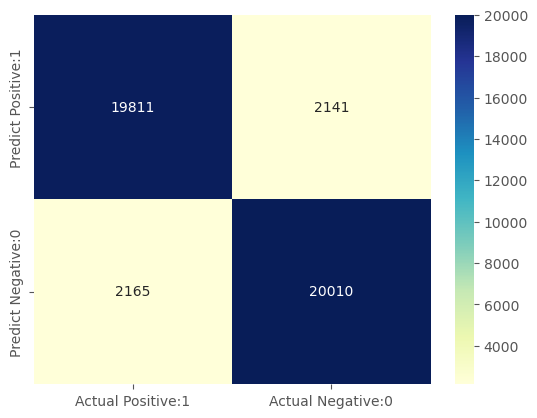

In [69]:
cm = confusion_matrix(y_test, rf_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Support Vector Machine

In [110]:
svc_pred = svc_model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, lr_pred)
print('predicted response: ', svc_pred, sep='\n')
print('Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, svc_pred))

NameError: name 'svc_model' is not defined

## Kesimpulan